Evaluate genes notebook
=======================

### Load pathes and dependencies ###

In [162]:
from pathlib import Path
if(Path("./data").exists()):
    base_dir = Path("./")
else:
    base_dir = Path("../")
print(base_dir.absolute())

data_dir = base_dir / "data"
input_dir = data_dir / "input"
output_dir =  data_dir / "output"
genes_dir = input_dir / "genes"
expressions_dir = input_dir / "expressions"

/data/sources/species/notebooks/..


In [163]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
path_by_class = genes_dir / "by_animal_class"
path_all = genes_dir / "all"

def kids(folder: Path):    
    for d in folder.iterdir():
        print(d.absolute())
kids(genes_dir)

/data/sources/species/notebooks/../data/input/genes/by_animal_class
/data/sources/species/notebooks/../data/input/genes/by_animal_class.dvc
/data/sources/species/notebooks/../data/input/genes/all


In [165]:
animal_classes = [ "Mammalia", "Aves", "Reptilia", "Teleostei", "Chondrichthyes", "Coelacanthi" ]

In [166]:
pd.set_option('display.max_columns', None)
import pprint
pp = pprint.PrettyPrinter(indent=4)


## Load gene tables ##

In [167]:
def load_table(path: Path, index: str = None):    
    if index is None:
        return pd.read_csv(str(path), sep="\t", index_col=False)
    else:
        return pd.read_csv(str(path), sep="\t", index_col=index)

from dataclasses import dataclass
@dataclass
class OrthologyTable:
    one2one: pd.DataFrame
    one2many: pd.DataFrame
    one2many_directed: pd.DataFrame
    many2many: pd.DataFrame
    all: pd.DataFrame
    
    def drop(self, column: str):
        self.one2one.drop(columns=[column], inplace=True)
        self.one2many.drop(columns=[column], inplace=True)
        self.one2many_directed.drop(columns=[column], inplace=True)
        self.many2many.drop(columns=[column], inplace=True)
        self.all.drop(columns=[column], inplace=True)        
        return self
            
def load_tables(folder :Path, index: str = None) -> OrthologyTable:
    return OrthologyTable(load_table(folder / "one2one.tsv", index), 
                          load_table(folder / "one2many.tsv", index), 
                          load_table(folder / "one2many_directed.tsv", index), 
                          load_table(folder / "many2many.tsv", index), 
                          load_table(folder / "all.tsv", index))


In [168]:
birds = load_tables(path_by_class / "Aves", "reference_gene")
reptiles = load_tables(path_by_class / "Reptilia", "reference_gene")
mammals = load_tables(path_by_class / "Mammalia", "reference_gene").drop(":Homo_sapiens")
mammals.all.head(4)

,:Pan_troglodytes,:Equus_caballus,:Pan_paniscus,:Tursiops_truncatus,:Macaca_mulatta,:Macaca_fascicularis,:Macaca_nemestrina,:Ailuropoda_melanoleuca,:Ursus_americanus,:Heterocephalus_glaber,:Rhinolophus_ferrumequinum,:Felis_catus,:Sus_scrofa,:Bos_grunniens,:Ovis_aries,:Callithrix_jacchus,:Ornithorhynchus_anatinus,:Phascolarctos_cinereus,:Capra_hircus,:Suricata_suricatta,:Bos_taurus,:Otolemur_garnettii,:Microcebus_murinus,:Sarcophilus_harrisii,:Cavia_porcellus,:Erinaceus_europaeus,:Tupaia_belangeri,:Oryctolagus_cuniculus,:Meriones_unguiculatus,:Cavia_aperea,:Monodelphis_domestica,:Mus_musculus,:Mesocricetus_auratus,:Rattus_norvegicus,:Mus_spicilegus
reference_gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ens:ENSG00000242265,ens:ENSPTRG00000023648,ens:ENSECAG00000001603,ens:ENSPPAG00000030053,ens:ENSTTRG00000003114,ens:ENSMMUG00000032524,ens:ENSMFAG00000045560,ens:ENSMNEG00000037924,ens:ENSAMEG00000019304,NaN,NaN,ens:ENSRFEG00010011916,ens:ENSFCAG00000041002,ens:ENSSSCG00000036049,ens:ENSBGRG00000010269,ens:ENSOARG00000002475,ens:ENSCJAG00000033086,NaN,ens:ENSPCIG00000028966,NaN,ens:ENSSSUG00005000112,ens:ENSBTAG00000053735,ens:ENSOGAG00000031169,ens:ENSMICG00000001469,ens:ENSSHAG00000001273,ens:ENSCPOG00000037165,NaN,NaN,ens:ENSOCUG00000027535,ens:ENSMUGG00000022866;ens:ENSMUGG00000022860,ens:ENSCAPG00000010493,NaN,ens:ENSMUSG00000092035,ens:ENSMAUG00000018656,NaN,ens:ENSMSIG00000000323
ens:ENSG00000139990,ens:ENSPTRG00000006478,ens:ENSECAG00000010524,ens:ENSPPAG00000042013,ens:ENSTTRG00000013941,ens:ENSMMUG00000019346,ens:ENSMFAG00000003413,ens:ENSMNEG00000028207,ens:ENSAMEG00000014443,ens:ENSUAMG00000010770,ens:ENSHGLG00100003336;ens:ENSHGLG00100017958;...,ens:ENSRFEG00010004811,ens:ENSFCAG00000029516,ens:ENSSSCG00000039701,ens:ENSBGRG00000007044,ens:ENSOARG00000021180,ens:ENSCJAG00000042954,ens:ENSOANG00000012620,ens:ENSPCIG00000010372,ens:ENSCHIG00000021848,ens:ENSSSUG00005006529,ens:ENSBTAG00000048519,ens:ENSOGAG00000008452,ens:ENSMICG00000046667,ens:ENSSHAG00000000665,ens:ENSCPOG00000032392,ens:ENSEEUG00000011616,NaN,ens:ENSOCUG00000010281,ens:ENSMUGG00000023917,ens:ENSCAPG00000014053,ens:ENSMODG00000010219,ens:ENSMUSG00000049106,ens:ENSMAUG00000004350,ens:ENSRNOG00000004556,ens:ENSMSIG00000015740
ens:ENSG00000073921,ens:ENSPTRG00000004141,ens:ENSECAG00000019264,ens:ENSPPAG00000036162,ens:ENSTTRG00000001554,ens:ENSMMUG00000019618,ens:ENSMFAG00000002978,ens:ENSMNEG00000029285,ens:ENSAMEG00000008778,ens:ENSUAMG00000018059,ens:ENSHGLG00100018440,ens:ENSRFEG00010012989,ens:ENSFCAG00000029123,ens:ENSSSCG00000014913,ens:ENSBGRG00000024679,ens:ENSOARG00000004654,ens:ENSCJAG00000014262,ens:ENSOANG00000013205,ens:ENSPCIG00000018862,ens:ENSCHIG00000015634,ens:ENSSSUG00005014072,ens:ENSBTAG00000001657,ens:ENSOGAG00000013950,ens:ENSMICG00000017261,ens:ENSSHAG00000004629,ens:ENSCPOG00000020758,ens:ENSEEUG00000013932,ens:ENSTBEG00000000600,ens:ENSOCUG00000023809,ens:ENSMUGG00000002616,ens:ENSCAPG00000000355,ens:ENSMODG00000004297,ens:ENSMUSG00000039361,ens:ENSMAUG00000011448,ens:ENSRNOG00000018322,ens:ENSMSIG00000002381
ens:ENSG00000139687,ens:ENSPTRG00000005864,ens:ENSECAG00000014575,ens:ENSPPAG00000002165,ens:ENSTTRG00000004232,ens:ENSMMUG00000007891,ens:ENSMFAG00000004544,ens:ENSMNEG00000030265,ens:ENSAMEG00000003640,ens:ENSUAMG00000011956,ens:ENSHGLG00100008595,ens:ENSRFEG00010000766,ens:ENSFCAG00000024529,ens:ENSSSCG00000009401,ens:ENSBGRG00000020100,ens:ENSOARG00000008246,ens:ENSCJAG00000009076,ens:ENSOANG00000031580;ens:ENSOANG00000015555,ens:ENSPCIG00000029307,ens:ENSCHIG00000004374,ens:ENSSSUG00005003247,ens:ENSBTAG00000006640,ens:ENSOGAG00000007461,ens:ENSMICG00000001747,ens:ENSSHAG00000014024,ens:ENSCPOG00000008683,ens:ENSEEUG00000000076,ens:ENSTBEG00000014454,ens:ENSOCUG00000016404,ens:ENSMUGG00000019124,ens:ENSCAPG00000014795,ens:ENSMODG00000011168,ens:ENSMUSG00000022105,ens:ENSMAUG00000020865,ens:ENSRNOG00000016029,ens:ENSMSIG00000007265


In [169]:
(mammals.all.shape, mammals.one2one.shape)

((23272, 35), (21668, 35))

# Missing value analysis #

## Plot missing genes for all species and mammals (one2one and all modes) ##

In [344]:
def show_missing(df: pd.DataFrame, title: str = "missing plot", ax = None):
     return sns.heatmap(df.notnull(), cbar=False,ax=ax).set_title(title)        

In [352]:
def missing_values(table: OrthologyTable, name: str = None):
    fig, axs = plt.subplots(2,2,figsize=(20,12))
    if not name is None:
        fig.suptitle(name, fontsize=16)
    #all = (table.one2one.notnull() *1  + table.one2many.notnull() *1 + table.many2many.notnull()*1).fillna(0)
    sns.heatmap(table.all.notnull(), cbar=False,ax=axs[0,0]).set_title('ALL')
    sns.heatmap(table.one2one.notnull(), cbar=False,ax=axs[0,1]).set_title('One2One')    
    sns.heatmap(table.one2many.notnull(), cbar=False,ax=axs[1,0]).set_title('One2Many')
    #sns.heatmap(table.one2many_directed.isnull(), cbar=False,ax=axs[1,1])
    sns.heatmap(table.many2many.notnull(), cbar=False,ax=axs[1,1]).set_title('Many2Many')

ValueError: zero-size array to reduction operation fmin which has no identity

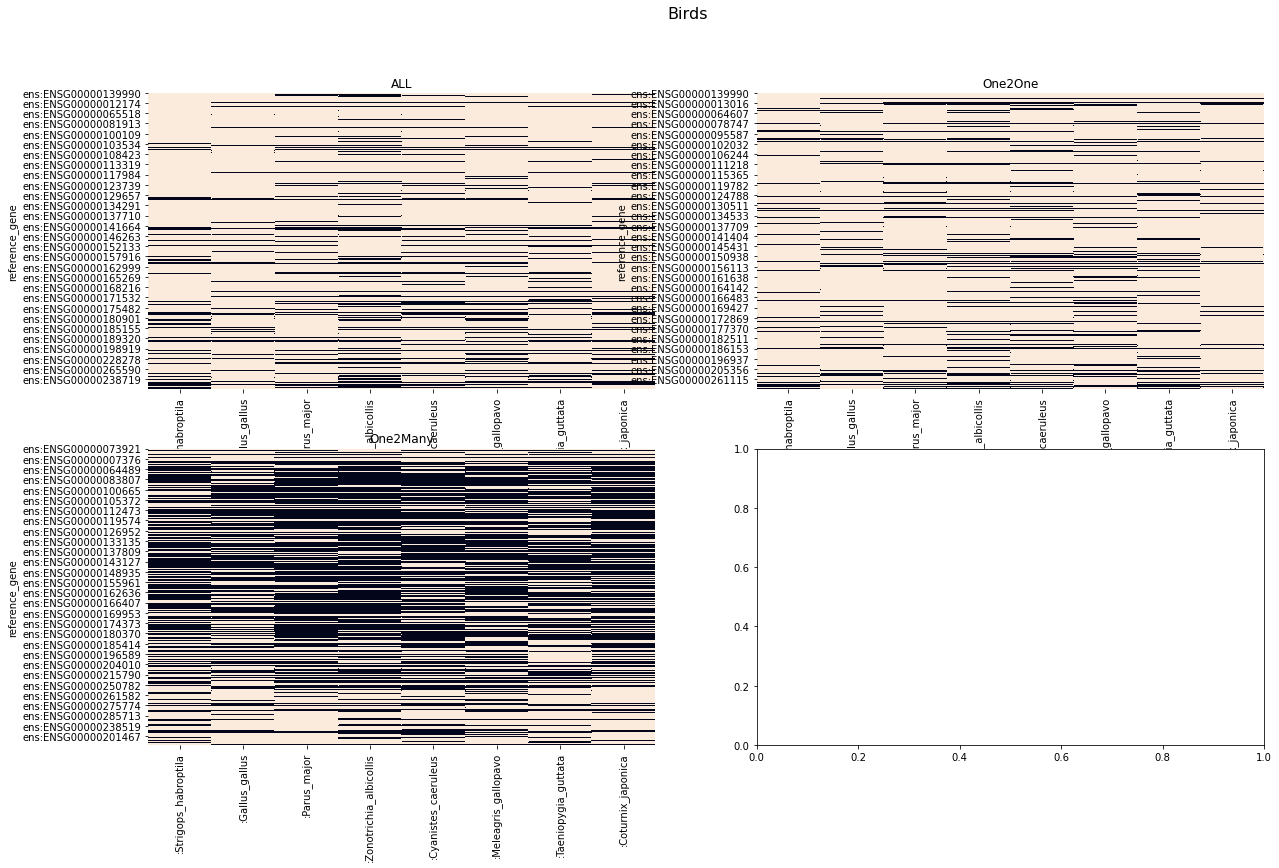

In [353]:
missing_values(birds, "Birds")

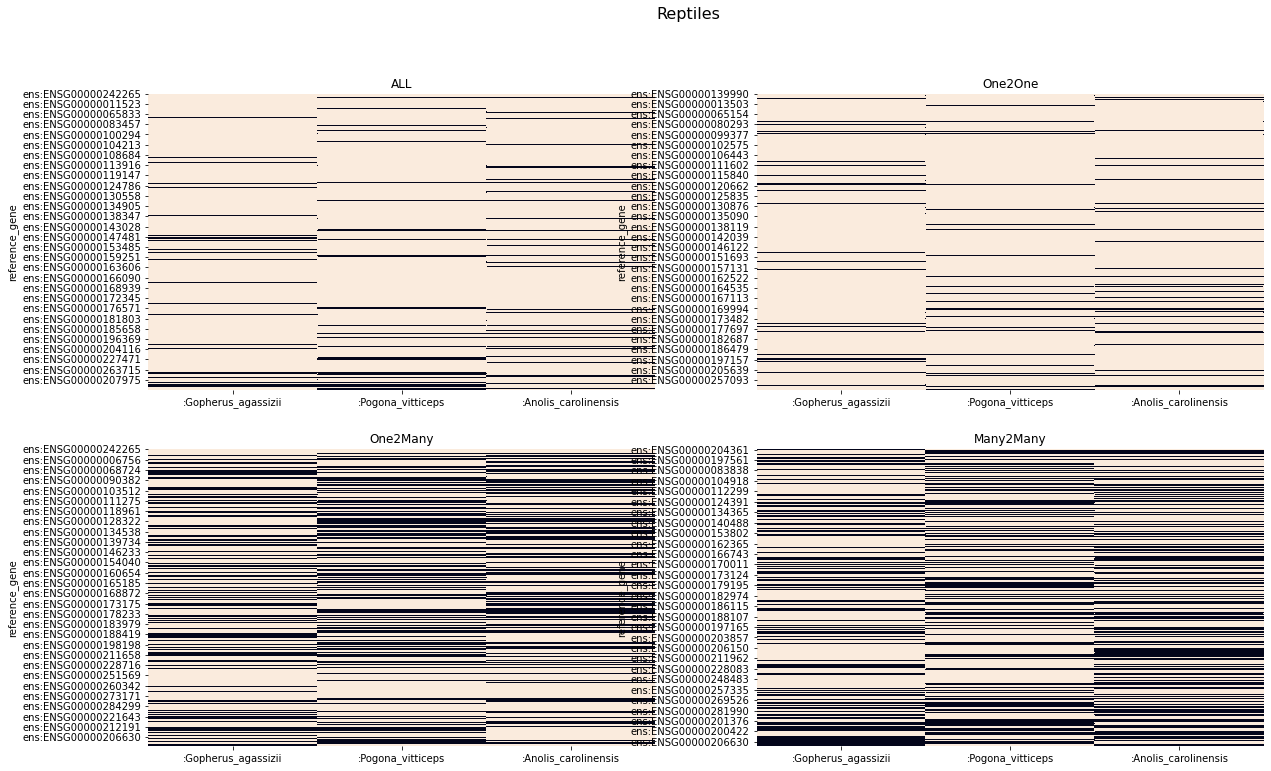

In [172]:
missing_values(reptiles, "Reptiles")

### Load species ###

In [253]:
species = load_table(input_dir / "species.tsv")
species.head(3)

,species,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,:Serinus_canaria,House canary,ens:Aves,24.0,https://www.ensembl.org/Serinus_canaria,13.3,0.230065,314.15,ens:taxon#9135
1,:Melopsittacus_undulatus,Budgerigar,ens:Aves,21.0,https://www.ensembl.org/Melopsittacus_undulatus,25.2,0.303500,314.15,ens:taxon#13146
2,:Homo_sapiens,Human,ens:Mammalia,122.5,https://www.ensembl.org/Homo_sapiens,70000.0,82.780000,310.15,ens:taxon#9606


### Count genes ###

In [299]:
def gc(df: pd.DataFrame, species: pd.DataFrame = None, index_field: str = None) -> pd.DataFrame:
    frame = df.notna().sum().sort_values(ascending=False).to_frame("genes")
    result = frame.reset_index().rename( columns= {"index": "species"})
    if species is None:
        return result
    else:
        field = "common_name" if index_field is None else index_field        
        return result.merge(species, on="species", how="inner").set_index(field)

In [333]:
def gene_counts(table: OrthologyTable, species: pd.DataFrame = None, field: str = None, name: str = None):
    fig, axs = plt.subplots(2,2 ,figsize=(20,20))
    if not name is None:
        fig.suptitle(name, fontsize=16)
    plt.subplots_adjust(left=0.2, bottom=0.5, right=0.9, top=0.9, wspace=0.2, hspace=1)
    rot = 75
    gc(table.all, species,field).genes.plot(kind="bar", ax = axs[0,0], rot=rot)
    gc(table.one2one, species,field).genes.plot(kind="bar", ax = axs[0,1], rot=rot)    
    #(table.all.notna().sum() - table.one2one.notna().sum()).sort_values(ascending=False).plot(kind="bar", ax = axs[1,0], rot=rot)
    gc(table.many2many.isna(), species).genes.plot(kind="bar", ax = axs[1,1], rot=rot)

Text(0.5, 1.0, 'missing plot')

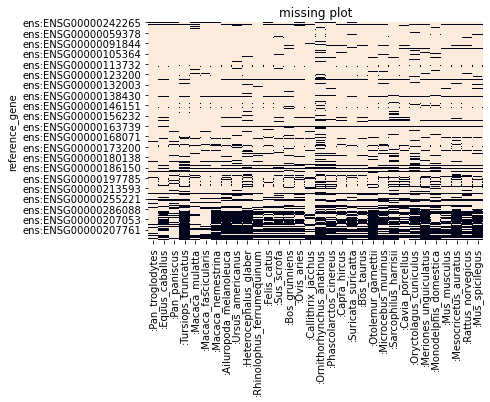

In [345]:
show_missing(mammals.all.drop(columns = [":Cavia_aperea", ":Tupaia_belangeri", ":Erinaceus_europaeus"]))

In [350]:
mammals.all.drop(columns = [":Cavia_aperea", ":Tupaia_belangeri", ":Erinaceus_europaeus"]).dropna().shape

(6282, 32)

In [351]:
mammals.one2one.drop(columns = [":Cavia_aperea", ":Tupaia_belangeri", ":Erinaceus_europaeus"]).dropna().shape

(2742, 32)

In [ ]:
gc(mammals.all.drop(columns = [":Cavia_aperea", ":Tupaia_belangeri", ":Erinaceus_europaeus"])).dropna().shape

In [337]:
gc(mammals.all)

,species,genes
0,:Pan_troglodytes,21630
1,:Pan_paniscus,20722
2,:Macaca_fascicularis,20449
3,:Macaca_mulatta,19900
4,:Callithrix_jacchus,19615
5,:Mus_musculus,19086
6,:Bos_taurus,18986
7,:Equus_caballus,18896
8,:Capra_hircus,18767
9,:Felis_catus,18748


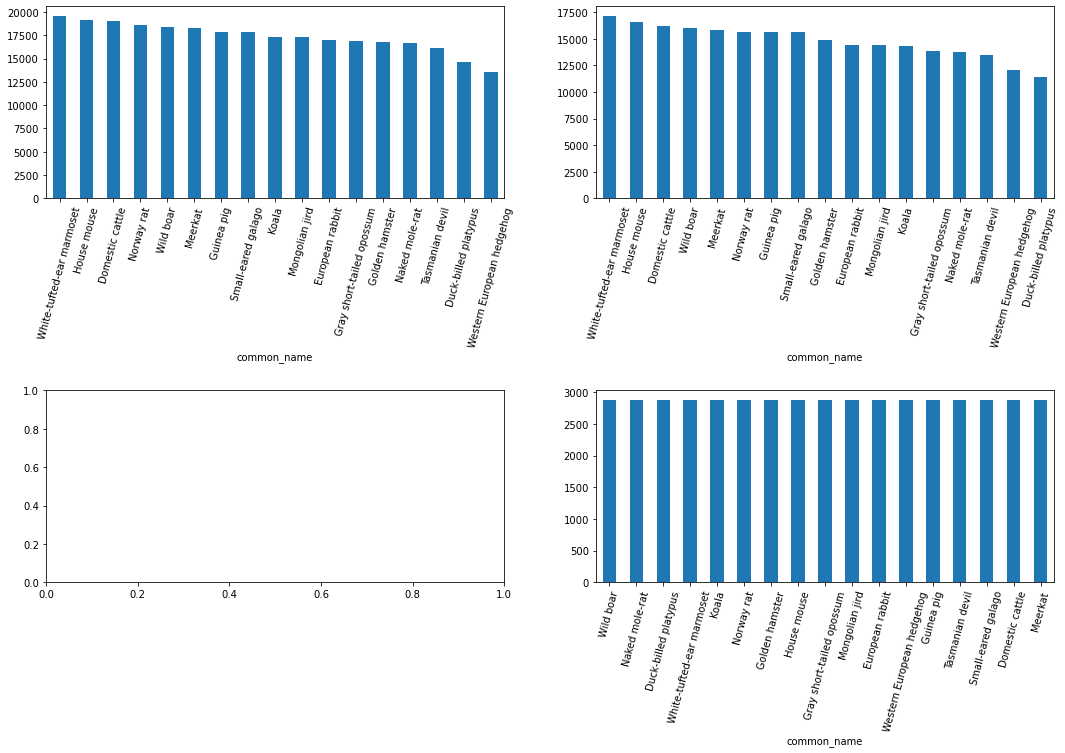

In [338]:
gene_counts(mammals, species)

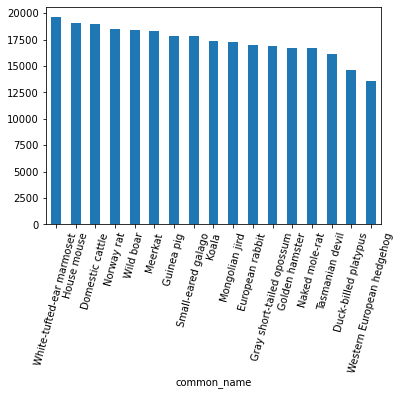

In [314]:
rot = 75
gc(mammals.all, species).genes.plot(kind="bar",  rot=rot)    

# Samples ex

In [133]:
samples = load_table(input_dir / "samples.tsv")
samples.head(3)

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol
0,ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287653,:Ailuropoda_melanoleuca,:Blood,SL01,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,19,female,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,96,2020-03-09 18:13:39.812,NaN
1,ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287654,:Ailuropoda_melanoleuca,:Blood,XB01,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,12,male,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,96,2020-02-18 18:40:17.122,NaN
2,ncbi:bioproject/PRJNA247712,ncbi:bioproject/PRJNA247712,sra:SRR1287655,:Ailuropoda_melanoleuca,:Blood,XB02,'Tumor:no;BioSampleModel:Model organism or ani...,samples:Illumina_HiSeq_2000,6,female,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,The giant panda blood Transcriptome,1.1.0,samples:PAIRED,samples:PCR,samples:RNA-Seq,A,128,2020-02-20 15:23:40.197,NaN


In [14]:
species = load_table(input_dir / "species.tsv")
species.head(3)

,species,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,:Serinus_canaria,House canary,ens:Aves,24.0,https://www.ensembl.org/Serinus_canaria,13.3,0.230065,314.15,ens:taxon#9135
1,:Melopsittacus_undulatus,Budgerigar,ens:Aves,21.0,https://www.ensembl.org/Melopsittacus_undulatus,25.2,0.303500,314.15,ens:taxon#13146
2,:Homo_sapiens,Human,ens:Mammalia,122.5,https://www.ensembl.org/Homo_sapiens,70000.0,82.780000,310.15,ens:taxon#9606


In [38]:
samples_ext = samples.merge(species,on="species", how="inner")
samples_ext.head(3)

,bioproject,series,run,species,tissue,sample_name,characteristics,sequencer,age,sex,tumor,source,study,study_title,salmon_version,library_layout,library_selection,library_strategy,lib_type,bootstrap,modified,protocol,common_name,animal_class,lifespan,ensembl_url,mass_g,metabolic_rate,temperature_kelvin,taxon
0,ncbi:bioproject/PRJNA210317,ncbi:bioproject/PRJNA210317,sra:SRR924544,:Bos_taurus,:Blood,GSM1179805,source_name:Poly A+ RNA from peripheral white ...,samples:Illumina_Genome_Analyzer_IIx,NaN,NaN,samples:no,blood,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,Characterization and Comparison of the Leukocy...,0.14.1,samples:PAIRED,samples:cDNA,samples:RNA-Seq,A,128,NaN,Tail vein blood was collected from 40 Holstein...,Domestic cattle,ens:Mammalia,20.0,https://www.ensembl.org/Bos_taurus,347000.0,306.77,311.15,ens:taxon#9913
1,ncbi:bioproject/PRJNA309284,ncbi:bioproject/PRJNA309284,sra:SRR3109705,:Bos_taurus,:Liver,GSM2042593,"'Tumor:no;strain:indigenous;location:Chengdu, ...",samples:Illumina_HiSeq_2500,~4 years old,NaN,samples:no,liver,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,Multi-tissue RNA-seq data across three species,0.14.1,samples:PAIRED,samples:cDNA,samples:RNA-Seq,A,128,2019-08-08 11:45:53.723,The total RNA was extracted using the TrIzol r...,Domestic cattle,ens:Mammalia,20.0,https://www.ensembl.org/Bos_taurus,347000.0,306.77,311.15,ens:taxon#9913
2,ncbi:bioproject/PRJNA309284,ncbi:bioproject/PRJNA309284,sra:SRR3109709,:Bos_taurus,:Kidney,GSM2042597,"'Tumor:no;strain:indigenous;location:Chengdu, ...",samples:Illumina_HiSeq_2500,~4 years old,NaN,samples:no,kidney,https://trace.ncbi.nlm.nih.gov/Traces/sra/?stu...,Multi-tissue RNA-seq data across three species,0.14.1,samples:PAIRED,samples:cDNA,samples:RNA-Seq,A,128,2019-08-08 11:48:35.7,The total RNA was extracted using the TrIzol r...,Domestic cattle,ens:Mammalia,20.0,https://www.ensembl.org/Bos_taurus,347000.0,306.77,311.15,ens:taxon#9913


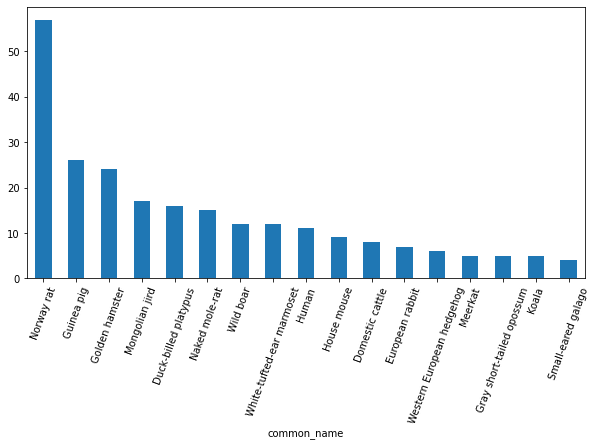

In [323]:
by_tissue = samples_ext.groupby(["common_name"]).run.count().sort_values(ascending=False)
by_tissue.plot(kind="bar", rot=70, figsize=(10,5))

In [61]:
by_tissue[1]

4